# Import dataset

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Load the dataset
file_path = 'ds_salaries.csv'
Salaries_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
Salaries_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [206]:
# Display basic information about the dataset
print(Salaries_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [207]:
Salaries_data.drop(['Unnamed: 0'],axis=1,inplace=True)
Salaries_data.drop(['salary','salary_currency'],axis=1,inplace=True)
Salaries_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [208]:
Salaries_data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [209]:
Salaries_data['experience_level']=Salaries_data['experience_level'].map({'MI':'Mid','SE':'Senior','EN':'Engineer','EX':'Executed'})
Salaries_data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,79833,DE,0,DE,L
1,2020,Senior,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior,FT,Machine Learning Engineer,150000,US,50,US,L


In [210]:
Salaries_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [211]:
Salaries_data.duplicated().sum()

42

In [212]:
Salaries_data.drop_duplicates(inplace=True)

In [213]:
Salaries_data.shape

(565, 9)

# Descriptive statistics for each job role

In [214]:
# Descriptive statistics for each job role
job_role_stats = Salaries_data.groupby('job_title')['salary_in_usd'].describe()
print(job_role_stats)

                                          count           mean            std  \
job_title                                                                       
3D Computer Vision Researcher               1.0    5409.000000            NaN   
AI Scientist                                7.0   66135.571429   70152.164338   
Analytics Engineer                          4.0  175000.000000   29508.077990   
Applied Data Scientist                      5.0  175655.000000  123647.186470   
Applied Machine Learning Scientist          4.0  142068.750000  188246.696933   
BI Data Analyst                             6.0   74755.166667   50989.558548   
Big Data Architect                          1.0   99703.000000            NaN   
Big Data Engineer                           8.0   51974.000000   42954.761263   
Business Data Analyst                       5.0   76691.200000   43814.851149   
Cloud Data Engineer                         2.0  124647.000000   49996.692071   
Computer Vision Engineer    

In [220]:
# Mean salary comparison across different job roles
mean_salaries = Salaries_data.groupby('job_title')['salary_in_usd'].mean()
print(mean_salaries)

job_title
3D Computer Vision Researcher                 5409.000000
AI Scientist                                 66135.571429
Analytics Engineer                          175000.000000
Applied Data Scientist                      175655.000000
Applied Machine Learning Scientist          142068.750000
BI Data Analyst                              74755.166667
Big Data Architect                           99703.000000
Big Data Engineer                            51974.000000
Business Data Analyst                        76691.200000
Cloud Data Engineer                         124647.000000
Computer Vision Engineer                     44419.333333
Computer Vision Software Engineer           105248.666667
Data Analyst                                 90089.597561
Data Analytics Engineer                      64799.250000
Data Analytics Lead                         405000.000000
Data Analytics Manager                      127134.285714
Data Architect                              177873.909091
Data

In [221]:
# Median salary comparison across different job roles
median_salaries = Salaries_data.groupby('job_title')['salary_in_usd'].median()
print(median_salaries)

job_title
3D Computer Vision Researcher                 5409.0
AI Scientist                                 45896.0
Analytics Engineer                          179850.0
Applied Data Scientist                      157000.0
Applied Machine Learning Scientist           56700.0
BI Data Analyst                              76500.0
Big Data Architect                           99703.0
Big Data Engineer                            41305.5
Business Data Analyst                        70912.0
Cloud Data Engineer                         124647.0
Computer Vision Engineer                     26304.5
Computer Vision Software Engineer            95746.0
Data Analyst                                 90000.0
Data Analytics Engineer                      64598.5
Data Analytics Lead                         405000.0
Data Analytics Manager                      120000.0
Data Architect                              180000.0
Data Engineer                               100800.0
Data Engineering Manager            

In [222]:
# Mode salary comparison across different job roles
mode_salaries = Salaries_data.groupby('job_title')['salary_in_usd'].agg(lambda x: x.mode().iloc[0])
print(mode_salaries)

job_title
3D Computer Vision Researcher                 5409
AI Scientist                                 12000
Analytics Engineer                          135000
Applied Data Scientist                       54238
Applied Machine Learning Scientist           31875
BI Data Analyst                               9272
Big Data Architect                           99703
Big Data Engineer                             5882
Business Data Analyst                        18442
Cloud Data Engineer                          89294
Computer Vision Engineer                     10000
Computer Vision Software Engineer            70000
Data Analyst                                 80000
Data Analytics Engineer                      20000
Data Analytics Lead                         405000
Data Analytics Manager                      120000
Data Architect                               90700
Data Engineer                                78526
Data Engineering Manager                     59303
Data Science Consulta

In [223]:
# Minimum & Maximum salary comparison across different job roles
job_stats = Salaries_data.groupby('job_title')['salary_in_usd'].agg(['min', 'max'])
print(job_stats)

                                             min     max
job_title                                               
3D Computer Vision Researcher               5409    5409
AI Scientist                               12000  200000
Analytics Engineer                        135000  205300
Applied Data Scientist                     54238  380000
Applied Machine Learning Scientist         31875  423000
BI Data Analyst                             9272  150000
Big Data Architect                         99703   99703
Big Data Engineer                           5882  114047
Business Data Analyst                      18442  135000
Cloud Data Engineer                        89294  160000
Computer Vision Engineer                   10000  125000
Computer Vision Software Engineer          70000  150000
Data Analyst                                6072  200000
Data Analytics Engineer                    20000  110000
Data Analytics Lead                       405000  405000
Data Analytics Manager         

In [224]:
# Standard deviation and variance of salary comparison across different job roles
Sdv_stats = Salaries_data.groupby('job_title')['salary_in_usd'].agg(['std', 'var'])
print(Sdv_stats)

                                                    std           var
job_title                                                            
3D Computer Vision Researcher                       NaN           NaN
AI Scientist                               70152.164338  4.921326e+09
Analytics Engineer                         29508.077990  8.707267e+08
Applied Data Scientist                    123647.186470  1.528863e+10
Applied Machine Learning Scientist        188246.696933  3.543682e+10
BI Data Analyst                            50989.558548  2.599935e+09
Big Data Architect                                  NaN           NaN
Big Data Engineer                          42954.761263  1.845112e+09
Business Data Analyst                      43814.851149  1.919741e+09
Cloud Data Engineer                        49996.692071  2.499669e+09
Computer Vision Engineer                   42984.849627  1.847697e+09
Computer Vision Software Engineer          40837.795060  1.667726e+09
Data Analyst        

# Salary Distribution

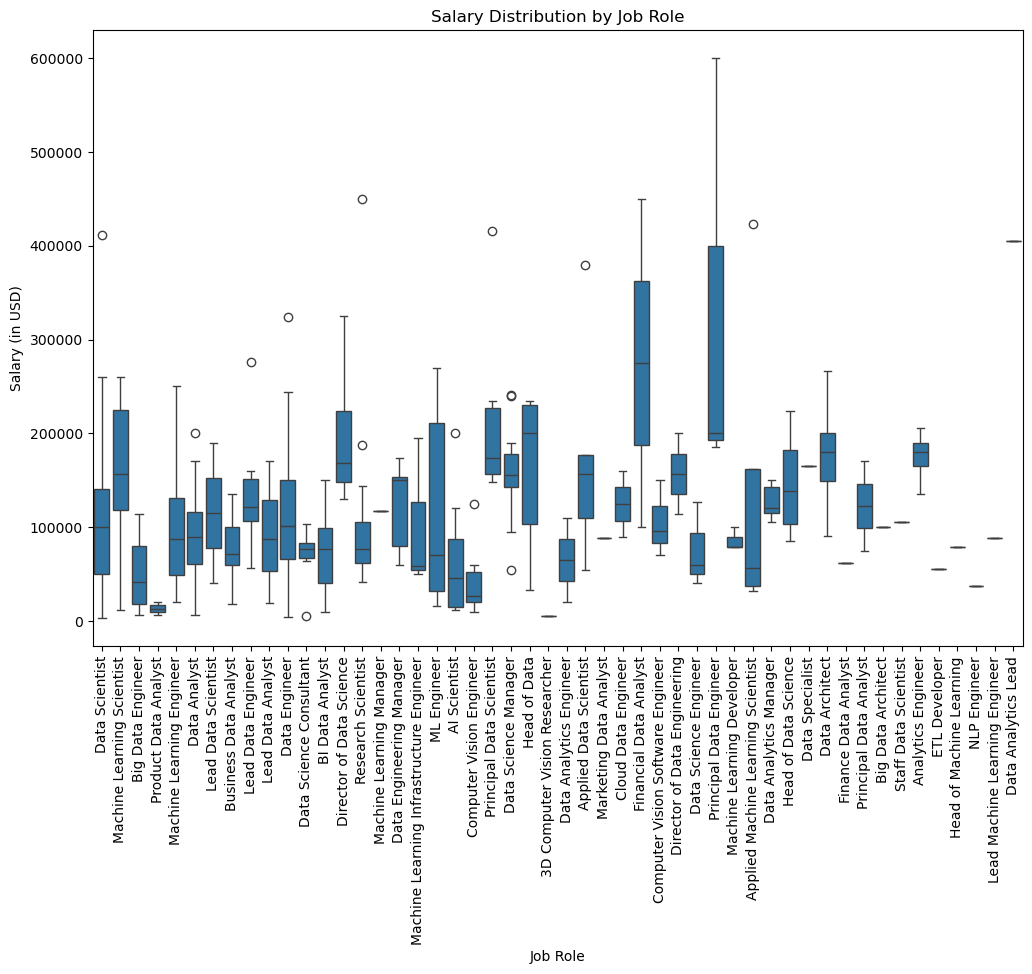

In [225]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=Salaries_data)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Salary (in USD)')
plt.show()

<Figure size 12000x8000 with 0 Axes>

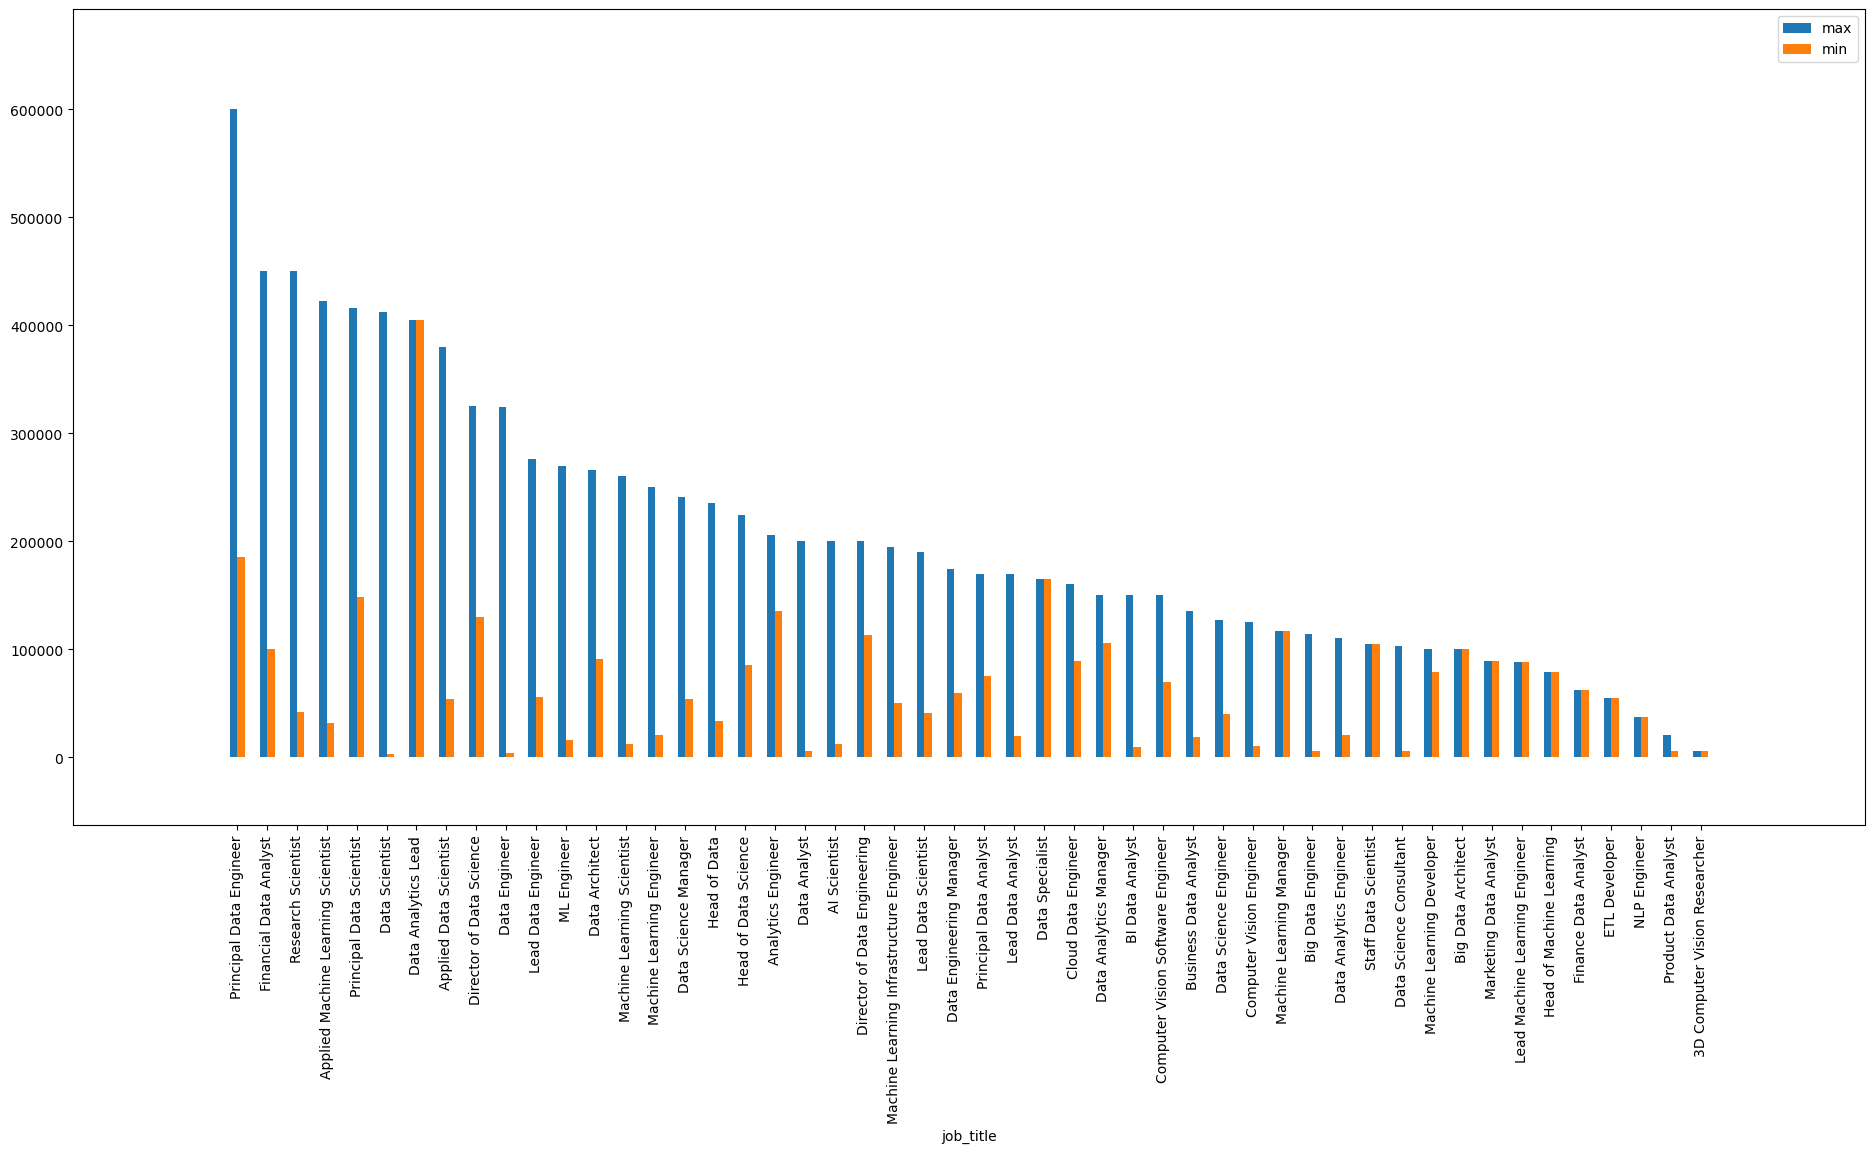

In [226]:
# Group data by job title and calculate statistics
job_stats = Salaries_data.groupby('job_title')['salary_in_usd'].agg(['max','min']).sort_values(by='max', ascending=False)
# Select top N job titles (adjust N as needed)
top_n_jobs = job_stats.head(50)  # Change 10 to the desired number of job titles

# Create a bar chart
plt.figure(figsize=(120, 80))  # Set a reasonable figure size
top_n_jobs.plot(kind='bar', stacked=False)  # Stacked=False for separate bars

# Adjust padding (adjust values as needed)
plt.subplots_adjust(left=0.05, right=2.85, bottom=0.15, top=1.85)

# Get current x and y-axis limits
current_x_min, current_x_max = plt.xlim()
current_y_min, current_y_max = plt.ylim()

# Increase limits by 10% (adjust as needed)
new_x_min = current_x_min - (current_x_max - current_x_min) * 0.1
new_x_max = current_x_max + (current_x_max - current_x_min) * 0.1
new_y_min = current_y_min - (current_y_max - current_y_min) * 0.1
new_y_max = current_y_max + (current_y_max - current_y_min) * 0.1

# Update axes limits
plt.xlim(new_x_min, new_x_max)
plt.ylim(new_y_min, new_y_max)

plt.show()

<Figure size 2.5e+16x1e+15 with 0 Axes>

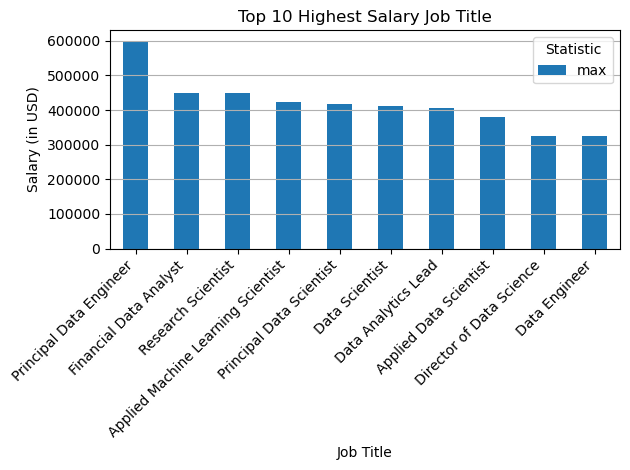

In [227]:
# Group data by job title and calculate statistics
job_stats = Salaries_data.groupby('job_title')['salary_in_usd'].agg(['max']).sort_values(by='max', ascending=False)
# Select top N job titles (adjust N as needed)
top_n_jobs = job_stats.head(10)  # Change 10 to the desired number of job titles

# Create a bar chart to visualize the statistics
plt.figure(figsize=(250000000999999, 10000000000000))
top_n_jobs.plot(kind='bar', stacked=False)  # Stacked=False for separate bars
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Adjust padding (adjust values as needed)
plt.subplots_adjust(left=0.05, right=0.85, bottom=0.15, top=1.85)

plt.title('Top 10 Highest Salary Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.legend(title='Statistic')  # Add legend title
plt.grid(axis='y')  # Add grid lines on y-axis
plt.tight_layout()  # Adjust spacing for better readability
plt.show()

<Figure size 2.5e+16x1e+15 with 0 Axes>

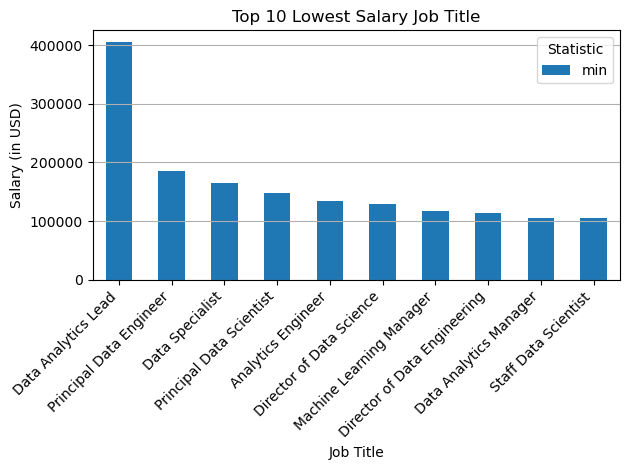

In [228]:
# Group data by job title and calculate statistics
job_stats = Salaries_data.groupby('job_title')['salary_in_usd'].agg(['min']).sort_values(by='min', ascending=False)
# Select top N job titles (adjust N as needed)
top_n_jobs = job_stats.head(10)  # Change 10 to the desired number of job titles

# Create a bar chart to visualize the statistics
plt.figure(figsize=(250000000999999, 10000000000000))
top_n_jobs.plot(kind='bar', stacked=False)  # Stacked=False for separate bars
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Adjust padding (adjust values as needed)
plt.subplots_adjust(left=0.05, right=0.85, bottom=0.15, top=1.85)

plt.title('Top 10 Lowest Salary Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.legend(title='Statistic')  # Add legend title
plt.grid(axis='y')  # Add grid lines on y-axis
plt.tight_layout()  # Adjust spacing for better readability
plt.show()

# Salary vs. Experience:

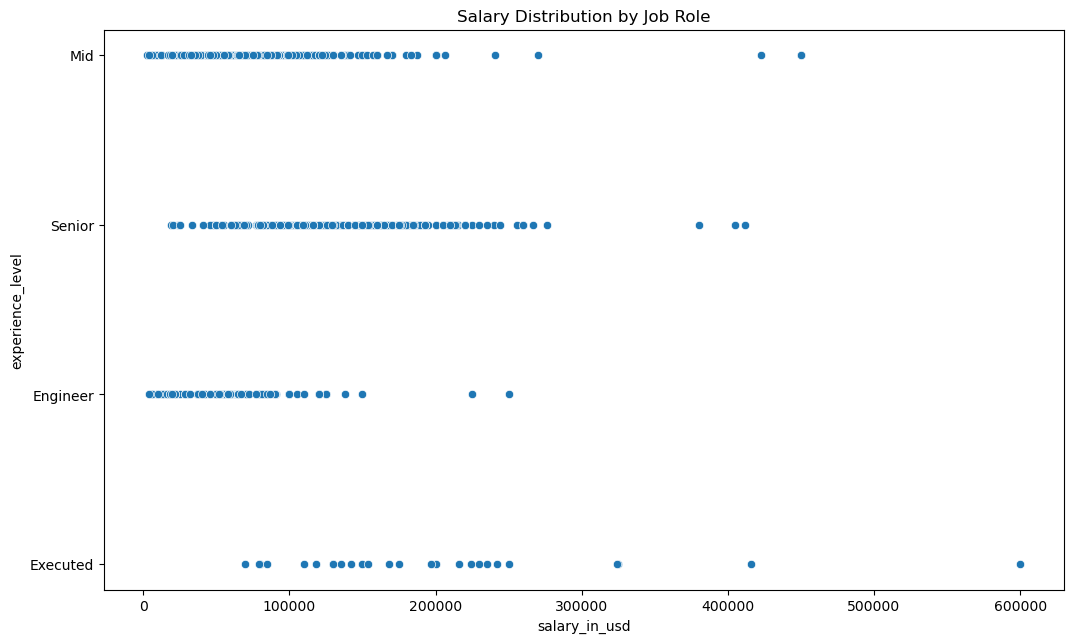

In [230]:
# Check if 'experience' column exists
if 'experience_level' not in Salaries_data.columns:
  print("Column 'experience' not found in Salaries_data. Please check your data.")
# Use existing columns 
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.05, right=0.85, bottom=0.15, top=0.85)
sns.scatterplot(x='salary_in_usd', y='experience_level', data=Salaries_data)  # Swap x and y based on your intent
plt.title('Salary Distribution by Job Role')  # Adjust title if needed
plt.show()

# Salary by Location

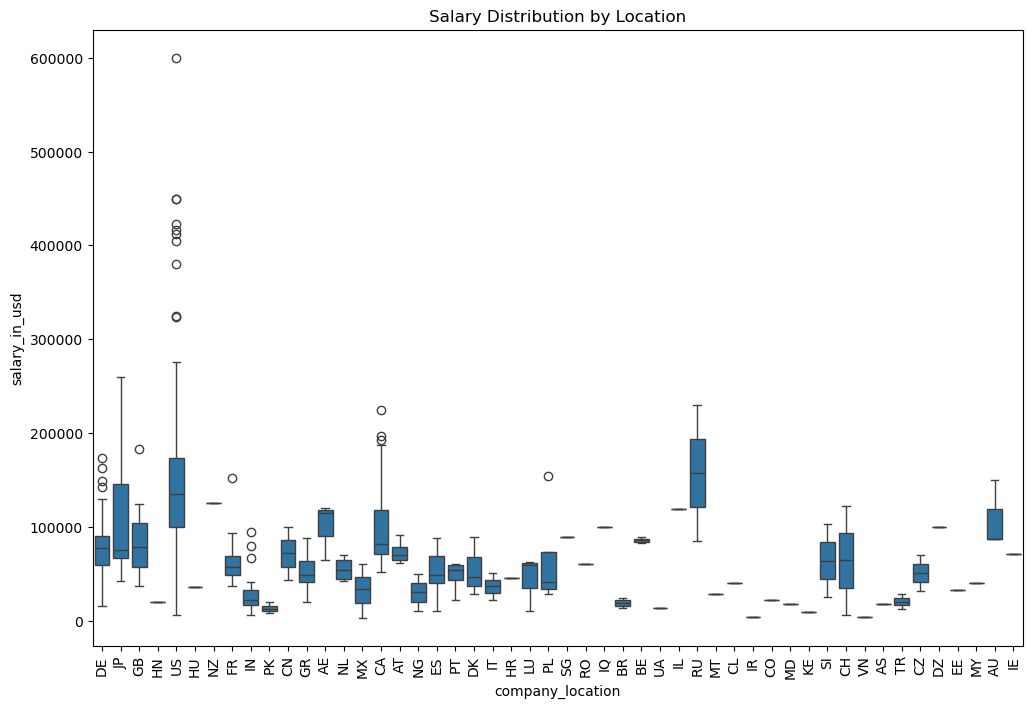

In [231]:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='company_location', y='salary_in_usd', data=Salaries_data)
    plt.xticks(rotation=90)
    plt.title('Salary Distribution by Location')
    plt.show()

# Correlation Analysis

Correlation between work_year and salary_in_usd: 0.15932599021510185


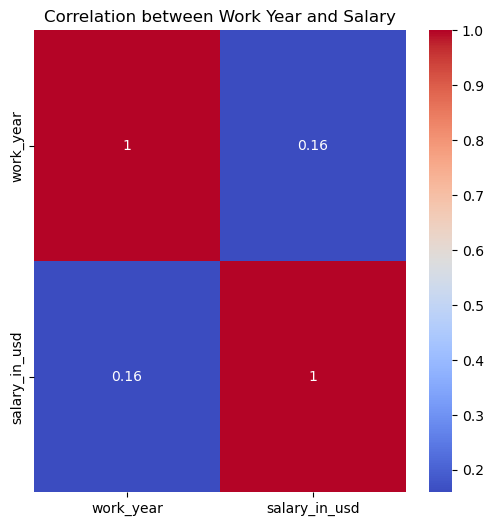

In [232]:
# Calculate correlation between work_year and salary_in_usd
work_year_correlation = Salaries_data['work_year'].corr(Salaries_data['salary_in_usd'])

# Print the correlation coefficient
print("Correlation between work_year and salary_in_usd:", work_year_correlation)

# Create a heatmap for work_year vs salary_in_usd correlation
correlation_subset = Salaries_data[['work_year', 'salary_in_usd']].corr()
plt.figure(figsize=(6, 6))  # Adjust figure size for a smaller heatmap
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm')
plt.title('Correlation between Work Year and Salary')
plt.show()